### #TITANIC DATASET PREDICTION:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:

data=pd.read_csv("Titanic-Dataset.csv")


In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data=data.drop(columns='Cabin',axis=1)

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [ ]:
data['Fare'].fillna(data['Fare'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

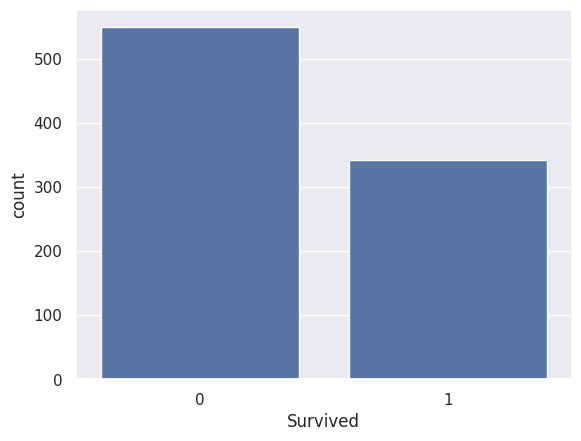

In [ ]:
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Sex', ylabel='count'>

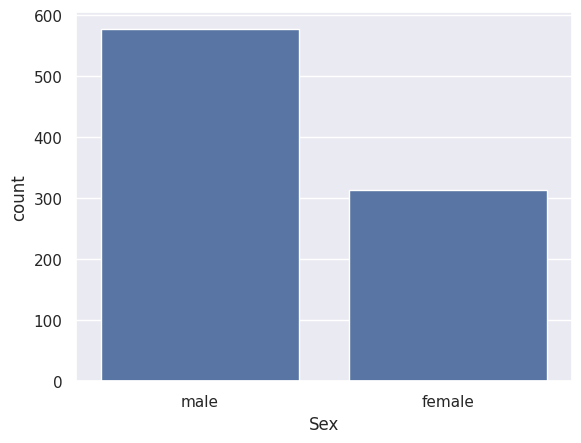

In [ ]:
sns.countplot(x='Sex',data=data)

<Axes: xlabel='Sex', ylabel='count'>

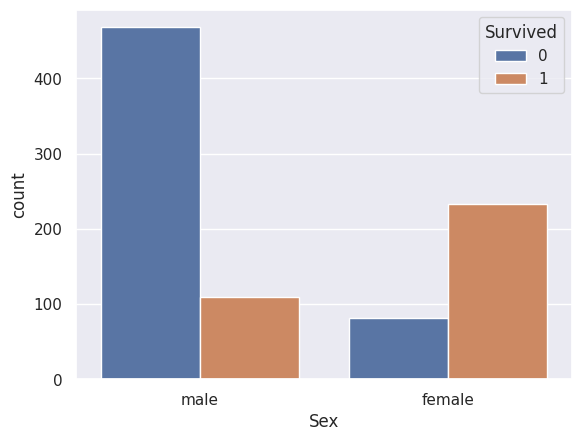

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

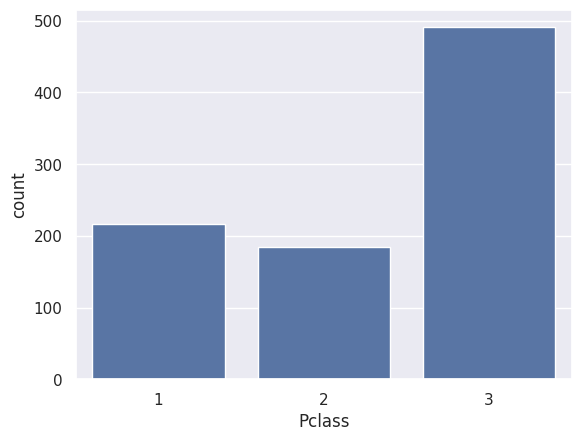

In [ ]:
sns.countplot(x='Pclass',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

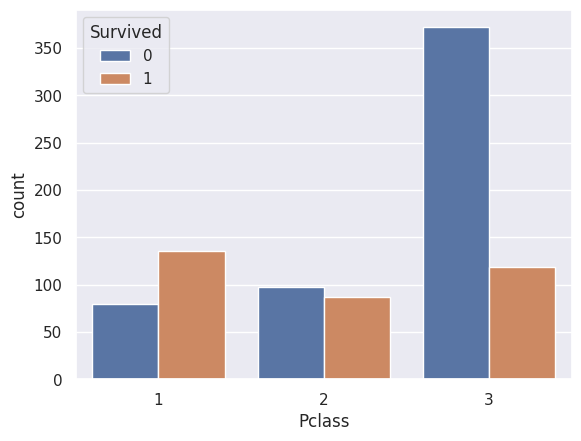

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=data)

In [ ]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [ ]:
X=data.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [ ]:
Y=data['Survived']

In [ ]:
print(X)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000         0
887         1       1    1  19.000000      0      0  30.0000         0
888         0       3    1  29.699118      1      2  23.4500         0
889         1       1    0  26.000000      0      0  30.0000         1
890         0       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [ ]:
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  1.0


In [ ]:
X_test_prediction=model.predict(X_test)

In [ ]:
print(X_test_prediction)

[1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 1.0


#CREDIT CARD FRAUD DETECTION:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
print(data.head())
print(data.describe())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [ ]:
data['Class'].value_counts()

,count
Class,
0.0,49461
1.0,148


In [ ]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]
print(legit.shape)
print(fraud.shape)

(49461, 31)
(148, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,49461.000000
mean,93.099593
std,253.325102
min,0.000000
25%,7.680000
50%,25.000000
75%,85.000000
max,12910.930000


In [ ]:
fraud.Amount.describe()

,Amount
count,148.000000
mean,100.170676
std,233.347471
min,0.000000
25%,1.000000
50%,9.560000
75%,99.990000
max,1809.680000


In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28809.010473,-0.220239,-0.003947,0.726173,0.167967,-0.240785,0.111250,-0.096470,0.042413,0.134593,...,0.046113,-0.031134,-0.106800,-0.039391,0.008275,0.135623,0.020410,0.003001,0.004455,93.099593
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33159,37114,-1.203736,1.334398,0.523791,-0.655456,-0.162992,-1.459474,1.090029,-0.162554,-0.947691,...,0.159482,0.313768,-0.136931,0.847421,-0.071148,0.885883,-0.486713,0.035092,51.90,0.0
9746,14482,1.115345,-0.225673,0.824732,0.187026,-0.679321,-0.054866,-0.636771,0.118530,1.584106,...,0.018126,0.222704,-0.010123,0.015499,0.070230,1.043716,-0.085975,-0.005404,39.00,0.0
18244,29328,1.230163,-0.516659,0.147058,-0.316475,-0.931660,-0.798757,-0.490145,-0.074562,-0.604707,...,-0.006691,-0.085982,0.020572,0.318912,0.330934,-0.295356,0.027789,0.045447,59.62,0.0
45350,42303,-1.373784,-0.080674,2.711809,1.347128,0.256678,-0.351185,-0.428362,0.200538,0.281153,...,-0.068448,-0.123802,-0.130061,0.403627,0.310352,-0.336794,-0.084476,0.267646,1.00,0.0
47366,43187,-1.410067,0.680756,0.031087,-0.987377,2.761632,3.667966,0.462011,0.561276,0.383829,...,-0.258406,-0.508623,-0.240517,0.990315,0.332158,-0.659279,-0.427879,-0.000683,38.57,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46909,42985,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1.0
46918,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1.0
46998,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1.0
47802,43369,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1.0
48094,43494,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90,1.0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,148


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,28099.308943,-0.283701,-0.004129,0.735445,0.057004,-0.267633,0.044177,-0.083550,0.103759,0.163579,...,0.025132,-0.080359,-0.099981,-0.019381,0.030604,0.117900,0.030107,-0.015208,0.010547,87.926098
1.0,26877.182432,-7.675017,5.448919,-10.398242,5.939649,-5.681176,-2.280722,-8.068966,3.739332,-3.587074,...,0.470319,0.886835,-0.225326,-0.284732,-0.084733,0.246743,0.155479,0.603171,0.030658,100.170676


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
33159  37114 -1.203736  1.334398  0.523791 -0.655456 -0.162992 -1.459474   
9746   14482  1.115345 -0.225673  0.824732  0.187026 -0.679321 -0.054866   
18244  29328  1.230163 -0.516659  0.147058 -0.316475 -0.931660 -0.798757   
45350  42303 -1.373784 -0.080674  2.711809  1.347128  0.256678 -0.351185   
47366  43187 -1.410067  0.680756  0.031087 -0.987377  2.761632  3.667966   
...      ...       ...       ...       ...       ...       ...       ...   
46909  42985 -4.075975  0.963031 -5.076070  4.955963 -0.161437 -2.832663   
46918  42988 -4.423508  1.648048 -6.934388  4.894601 -5.078131  0.010849   
46998  43028 -1.109646  0.811069 -1.138135  0.935265 -2.330248 -0.116106   
47802  43369 -3.365319  2.426503 -3.752227  0.276017 -2.305870 -1.961578   
48094  43494 -1.278138  0.716242 -1.143279  0.217805 -1.293890 -1.168952   

             V7        V8        V9  ...       V20       V21       V22  \
33159  1.0900

In [ ]:
print(Y)

33159    0.0
9746     0.0
18244    0.0
45350    0.0
47366    0.0
        ... 
46909    1.0
46918    1.0
46998    1.0
47802    1.0
48094    1.0
Name: Class, Length: 640, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(640, 30) (512, 30) (128, 30)


In [ ]:
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.982421875


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.96875


#SALES PREDICTION:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
data_file=pd.read_csv("advertising.csv")

In [ ]:
data_file.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
data_file.shape

(200, 4)

In [ ]:
data_file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data_file.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
sns.set()

<Axes: >

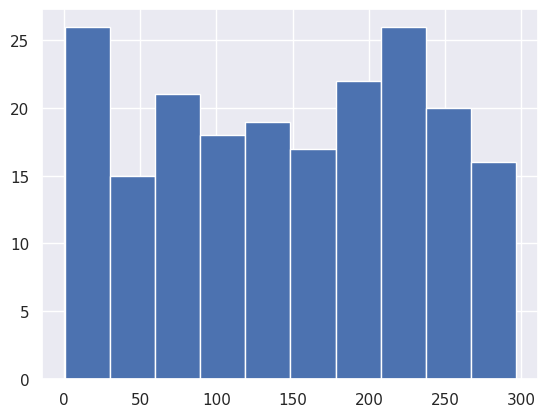

In [ ]:
data_file['TV'].hist()

<Axes: >

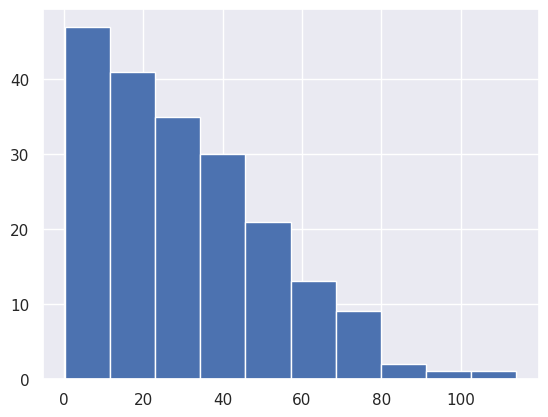

In [ ]:
data_file['Newspaper'].hist()

<Axes: >

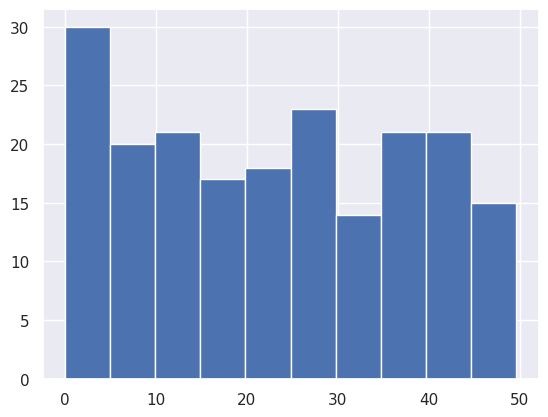

In [ ]:
data_file['Radio'].hist()

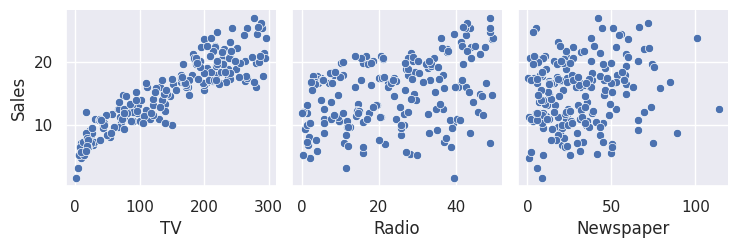

In [ ]:
sns.pairplot(data_file,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

<Axes: >

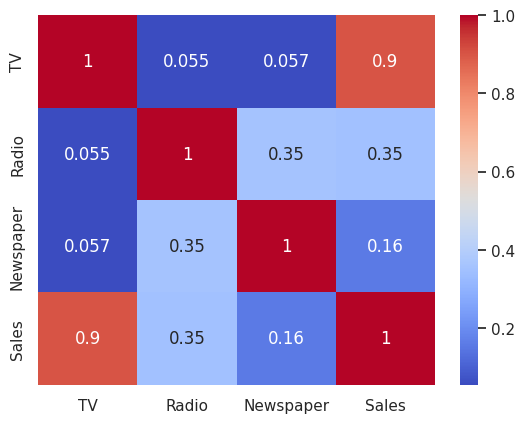

In [ ]:
sns.heatmap(data_file.corr(),annot=True,cmap='coolwarm')

In [ ]:
X=data_file.drop(columns='Sales')

In [ ]:
Y=data_file['Sales']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
prediction=model.predict(X_test)

In [ ]:
prediction

array([17.94221632, 11.28731032, 19.36406753, 15.25309499,  8.85035488,
       11.08345095, 24.54827272, 10.72184726, 18.64190205, 17.03877174,
       14.71887065, 13.30204368, 19.10529921, 11.4654086 , 13.82417942,
       14.56139355, 16.86156735, 17.27369971, 17.78634747, 21.28201581,
       19.1397699 , 11.05346066,  9.93276334, 11.49854807,  8.5309559 ,
       13.26073545, 21.75566382, 16.96066432, 24.25791572, 11.92392893,
       16.40376866, 21.96064207,  9.51770237, 10.16209996, 10.08141197,
       10.45644324, 15.54919097,  9.92133897, 13.83425453, 12.54320065,
       14.5093965 , 12.61758414,  6.46804914, 20.25656292, 23.16303373,
       24.65508581, 15.20817964,  9.27513655, 18.72004324, 18.16217728,
       12.73063894, 16.65175796, 15.79776032,  8.36188762, 21.22771856,
        9.52094834, 23.88078008, 23.29062902, 19.6930198 , 16.76467522])

In [ ]:
model.intercept_

5.022730805826269

In [ ]:
model.coef_

array([ 0.05223455,  0.10672463, -0.00120158])

In [ ]:
accuracy_score=model.score(X_test,Y_test)*100

In [ ]:
print(f"Accuracy of model: {accuracy_score}%")

Accuracy of model: 88.77675297095176%
